# NBA Homework Assignment

In [81]:
import pandas as pd

In [82]:
# Load data from Excel file
tiers_df = pd.read_excel("NBA_data.xlsx", sheet_name="Games By Tier")
prices_df = pd.read_excel("NBA_data.xlsx", sheet_name="Price Codes")
schedule_df = pd.read_excel("NBA_data.xlsx", sheet_name="Team Alpha Schedule (17-18)")
seats_df = pd.read_excel("NBA_data.xlsx", sheet_name="Seating Manifest")
resales_df = pd.read_excel("NBA_data.xlsx", sheet_name="Team Alpha Resale Transactions")

In [83]:
# Check data quality
tiers_df.head()

,Tier Name,Number of Games
0,Wowzers,2
1,Great,10
2,Good,14
3,Meh,18


In [84]:
# Check data quality
prices_df.head()

,PRICE CODES,A,B,C,D,E,F,G,H,I
0,CAPACITY,140,200,1300,2000,5000,300,2500,4000,3500
1,SEAT TYPE,Row A,Courtside,Lower Bowl,Lower Bowl,Lower Bowl,Upper Bowl,Upper Bowl,Upper Bowl,Upper Bowl
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Full Season Tickets,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Wowzers,2400,400,240,160,80,64,48,32,16


In [85]:
# Check data quality
schedule_df.head()

,DATE,DAY,Opponent,Time,Tier
0,2017-10-12,Thursday,Team26,8:00 PM,Meh
1,2017-10-18,Wednesday,Team16,7:30 PM,Meh
2,2017-10-20,Friday,Team27,8:00 PM,Meh
3,2017-10-28,Saturday,Team21,8:00 PM,Good
4,2017-10-30,Monday,Team16,7:00 PM,Meh


In [86]:
# Check data quality
seats_df.head()

,Manifest_id,section_name,row_name,seat_num,last_seat,num_seats,def_price_code
0,129,VIPAA,1,1,8,8,A
1,129,VIPAA,1,9,10,2,B
2,129,VIPAA,2,1,4,4,C
3,129,VIPAA,2,5,8,4,C
4,129,VIPFF,1,3,4,2,B


In [87]:
# Check data quality
resales_df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Date/Time,Zone,Section,Row,Seats,Sale Price,Marketplace
1,2017-10-12 20:00:00,Club,101,L,11 - 13,28.56,Provider1
2,2017-10-12 20:00:00,Club,101,L,14 - 17,35,Provider2
3,2017-10-12 20:00:00,Club,101,L,18 - 18,45,Provider2
4,2017-10-12 20:00:00,Club,101,M,11 - 12,0,Provider3


In [88]:
# Convert all values in prices_df to floats and replace non-numeric values with NaN
prices_df = prices_df.apply(pd.to_numeric, errors='coerce')

# Filter out rows containing NaN values
invalid_rows = prices_df[prices_df.isna().any(axis=1)]
print(invalid_rows)



    PRICE CODES            A           B            C            D  \
0           NaN   140.000000  200.000000  1300.000000  2000.000000   
1           NaN          NaN         NaN          NaN          NaN   
2           NaN          NaN         NaN          NaN          NaN   
3           NaN          NaN         NaN          NaN          NaN   
4           NaN  2400.000000  400.000000   240.000000   160.000000   
5           NaN  2000.000000  320.000000   200.000000   120.000000   
6           NaN  1600.000000  240.000000   160.000000    80.000000   
7           NaN  1200.000000  160.000000   120.000000    40.000000   
8           NaN  1563.636364  232.727273   156.363636    76.363636   
9           NaN          NaN         NaN          NaN          NaN   
10          NaN          NaN         NaN          NaN          NaN   
11          NaN          NaN         NaN          NaN          NaN   
12          NaN  3000.000000  500.000000   300.000000   200.000000   
13          NaN  250

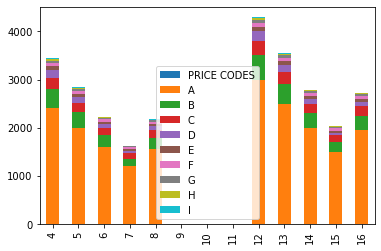

KeyError: 'Seat Type'

In [89]:
import matplotlib.pyplot as plt

# Plot the distribution of prices across all price codes
prices_df.drop([0, 1, 2, 3], inplace=True)  # Remove non-price rows
prices_df = prices_df.astype(float)
prices_df.plot(kind='bar', stacked=True)
plt.show()

# Analyze prices across different seating types
seats_df = seats_df.groupby(['Seat Type'])[['Capacity']].sum()
seats_df['Average Price'] = prices_df.mean()
seats_df['Revenue'] = seats_df['Capacity'] * seats_df['Average Price']
seats_df['Percent of Total Revenue'] = seats_df['Revenue'] / seats_df['Revenue'].sum() * 100
print(seats_df)

In [ ]:
# 2) Recommendations for Team Alpha in their new arena

# Conduct market research to better understand demand for different types of seating
# Example: use surveys to determine which sections fans are most interested in, and at what price points

# Implement dynamic pricing strategy to align prices with demand
# Example: use machine learning models to predict demand for upcoming games, and adjust prices accordingly

# Ensure pricing is competitive with other teams in the league
# Example: compare prices for comparable seating sections at other arenas, and adjust prices as needed

# Introduce new pricing tiers or seating options to appeal to a wider range of fans and increase revenue
# Example: consider adding premium seating options (e.g. luxury boxes) or more affordable seating options (e.g. standing-room only tickets)

# 3) Further analyses and additional data

# To identify opportunities, we could conduct a regression analysis to determine the factors that most strongly influence ticket prices (e.g. game time, opponent, day of the week, etc.)

# Additional data that would be useful for this analysis could include the following:
# - More detailed information on the pricing tiers, including specific seat locations and prices
# - Demographic information on Team Alpha fans (e.g. age, gender, income level)
# - Information on the effectiveness of different marketing and promotional strategies in driving ticket sales (e.g. social media campaigns, email marketing, etc.)

# How would you describe the pricing strategy Team Alpha utilized in the 2017-18 season?

- Team Alpha utilized variable pricing in the 2017-18 season, where the pricing strategy was determined by the strength of the opponent as well as the value of the seat in the stadium.

# What recommendations would you make for Team Alpha as they move to their new arena?

- Use pricing and attendance data to optimize pricing strategy
- Experiment with dynamic pricing based on game type, day of the week, and location within the arena
- Offer promotional discounts to increase ticket sales for less popular games or sections
- Consider changes to seating arrangements or amenities to improve fan satisfaction

# What further analyses would you want to conduct to identify opportunities you may not have had time to get through in this assignment?

### To identify further opportunities, we could conduct the following analyses:
- Identify trends in ticket sales over time, and use this information to forecast future sales and adjust pricing strategies accordingly
- Analyze fan demographics and preferences to identify which games are most appealing to different segments of the fan base
- Evaluate the impact of marketing campaigns and promotions on ticket sales, and adjust strategies accordingly to maximize their effectiveness

### To support these analyses, we could collect additional data on:
- Ticket sales and pricing information for future seasons
- Fan demographics and preferences, such as age, gender, income, and location
- Marketing and promotional data, such as campaign reach, engagement, and conversion rates